# Exploratory Data Analysis

### 사용 라이브러리

In [278]:
import pandas as pd
import numpy as np
from libs.lib import get_file_dir 

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 일반폐기물재활용률(10-19)

### 1.0 데이터 불러오기

In [337]:
df = pd.read_csv(get_file_dir('refined','일반폐기물재활용률(10-19).csv'))

### 2.0 데이터 탐색 및 전처리

In [338]:
df.info() 

# Not-null, 2520 ROW

# 행정구역별(1), (2)          object
# year (연도)             int64
# 일반폐기물재활용률(%)      object -> float
# 총재활용량(톤/일)         object -> float
# 생활폐기물총발생량(톤/일)  object -> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정구역별(1)   2340 non-null   object
 1   행정구역별(2)   2340 non-null   object
 2   year       2340 non-null   int64 
 3   일반폐기물재활용률  2340 non-null   object
 4   총재활용량      2340 non-null   object
 5   생활폐기물총발생량  2340 non-null   object
dtypes: int64(1), object(5)
memory usage: 109.8+ KB


##### 결측치 탐색 및 처리

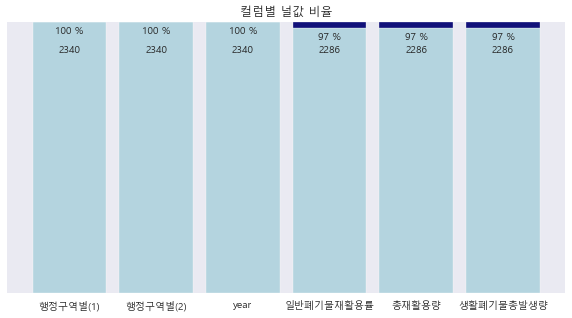

In [341]:
# 결측치 탐색 - 널값 비율 그래프

# Data
row = [0,1,2,3,4,5] # for X row

null_dict = {'notnull': [df['행정구역별(1)'].count(), df['행정구역별(2)'].count(), df['year'].count(), 
                          df['일반폐기물재활용률'].count(), df['총재활용량'].count(), df['생활폐기물총발생량'].count()],
              'isnull' : [df['행정구역별(1)'].isnull().sum(), df['행정구역별(2)'].isnull().sum(), df['year'].isnull().sum(),
                          df['일반폐기물재활용률'].isnull().sum(), df['총재활용량'].isnull().sum(), df['생활폐기물총발생량'].isnull().sum()]}

null_df = pd.DataFrame(null_dict)
 
# From raw value to percentage
data_totals = [i+j for i,j in zip(null_df['notnull'], null_df['isnull'])]
data_notnull = [i / j * 100 for i,j in zip(null_df['notnull'], data_totals)]
data_isnull = [i / j * 100 for i,j in zip(null_df['isnull'], data_totals)]
 
# plot
plt.figure(figsize=(10, 5))
barWidth = 0.85

# Create train bars
plot1 = plt.bar(row, data_notnull, color='#B4D4DF', edgecolor='white', width=barWidth)
plt.bar(row, data_isnull, bottom=data_notnull, color='#11117A', edgecolor='white', width=barWidth)


# Custom x axis
names = ('행정구역별(1)','행정구역별(2)','year','일반폐기물재활용률','총재활용량', '생활폐기물총발생량')
plt.xticks(row, names)

for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             0.95*height,'%d %%' % int(height), ha='center', va='bottom')

i = 0
for value in plot1:
    data_value = null_df['notnull'][i]
    plt.text(value.get_x() + value.get_width()/2.,
             0.90*height,'%d' % int(data_value), ha='center', va='bottom')
    i += 1

# Hide spines and ticks
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)

# Title
plt.title("컬럼별 널값 비율")

# Show graphic
plt.show()

In [342]:
# 모두 동일한 ROW에 54개 존재: 신설된 시군구로 인해 결즉치 발생 추측

# 결측치 정책: 0으로 대치

df.fillna(0, inplace=True)

df.isnull().sum()

행정구역별(1)     0
행정구역별(2)     0
year         0
일반폐기물재활용률    0
총재활용량        0
생활폐기물총발생량    0
dtype: int64

##### 데이터 타입 변환

In [343]:
# 자료형 변환

df['year'] = df['year'].astype('object')

df['일반폐기물재활용률'] = df['일반폐기물재활용률'].astype('float')

df['총재활용량'] = df['총재활용량'].astype('float')

df['생활폐기물총발생량'] = df['생활폐기물총발생량'].astype('float')

##### 기술통계

In [344]:
# 기술통계

df_describe = df.describe()
df_describe.loc['median'] = df[df['year']==2010].median() # 중앙값 추가
df_describe

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,2340.000000,2340.000000,2340.000000
mean,53.035000,131.879444,220.013974
std,18.476864,139.294137,216.906115
min,0.000000,0.000000,0.000000
25%,42.400000,23.900000,53.775000
50%,55.500000,89.250000,165.900000
75%,66.025000,199.675000,315.175000
max,100.000000,1105.800000,1526.900000
median,56.650000,86.050000,167.700000


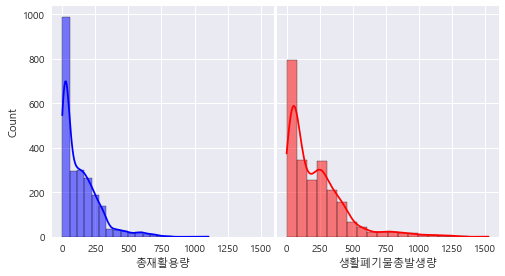

In [380]:
# 총재활용량, 생활폐기물총발생량 히스토그램

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
sns.histplot(data=df, x="총재활용량", kde=True, color="blue", ax=axes[0], bins=20)
sns.histplot(data=df, x="생활폐기물총발생량", kde=True, color="red", ax=axes[1], bins=20)
fig.subplots_adjust(top=0.925, wspace=0.01)
plt.show()

In [350]:
def get_describe(year):
    df_describe = df[df['year']==year].describe()
    df_describe.loc['median'] = df[df['year']==year].median() # 중앙값 추가
    return df_describe

get_describe(2010)

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,234.000000,234.000000,234.000000
mean,53.533761,126.912821,209.741453
std,16.506228,134.059860,205.994825
min,0.000000,0.000000,0.000000
25%,44.375000,22.975000,48.350000
50%,56.650000,86.050000,167.700000
75%,65.975000,181.325000,298.050000
max,90.400000,720.100000,1199.600000
median,56.650000,86.050000,167.700000


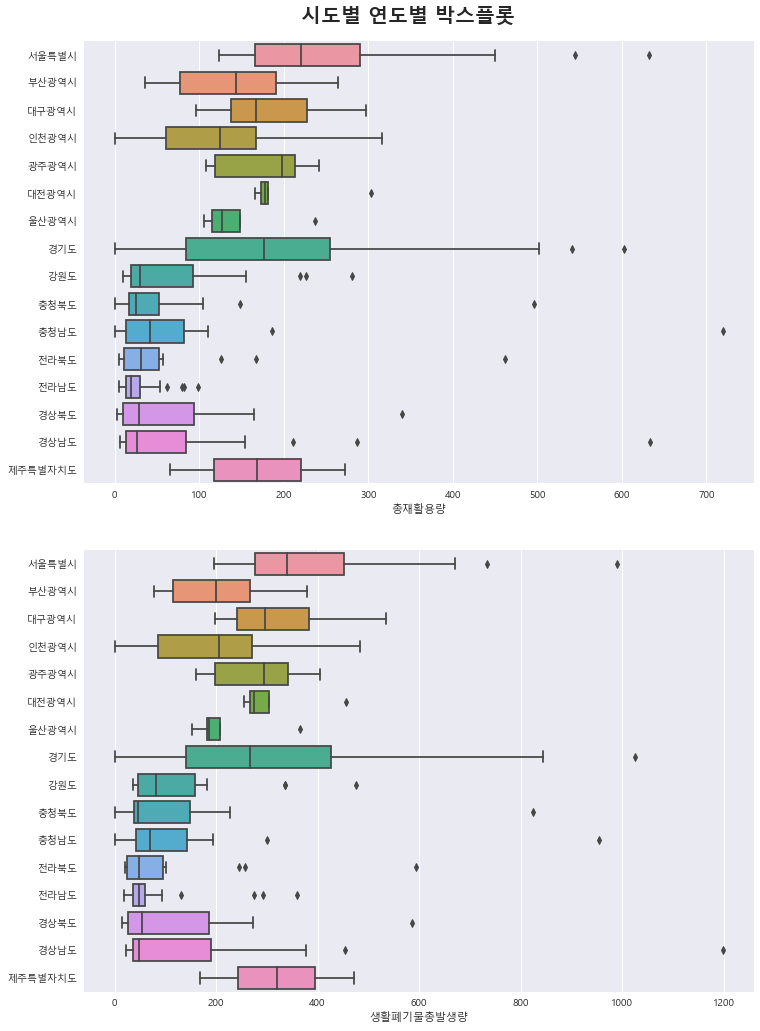

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,234.000000,234.000000,234.000000
mean,53.533761,126.912821,209.741453
std,16.506228,134.059860,205.994825
min,0.000000,0.000000,0.000000
25%,44.375000,22.975000,48.350000
50%,56.650000,86.050000,167.700000
75%,65.975000,181.325000,298.050000
max,90.400000,720.100000,1199.600000


In [400]:
# 시도별 연도별 박스플롯

def get_box_plot(year):
    fig, axes = plt.subplots(2, 1, figsize=(12,16))
    sns.boxplot(x='총재활용량', y='행정구역별(1)', data=df[df['year']==year], ax = axes[0])
    sns.boxplot(x='생활폐기물총발생량', y='행정구역별(1)', data=df[df['year']==year], ax = axes[1])
    plt.suptitle('시도별 연도별 박스플롯', fontsize=20, weight='bold')
    fig.subplots_adjust(top=0.95, hspace=0.15)
    
    for ax in axes:
        ax.set(ylabel=None)

    plt.show()
    return df[df['year']==year].describe()

get_box_plot(2010)


##### 이상치 탐색

### 3.0 시각적 EDA

In [287]:
# 상관관계 탐색

df.corr()

# 생활폐기물총발생량과 총재활용량은 뚜렷한 상관관계를 가짐.
# 일반폐기물재활용률 = 생활폐기물총발생량 / 총재활용량

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
일반폐기물재활용률,1.000000,0.498241,0.379290
총재활용량,0.498241,1.000000,0.972267
생활폐기물총발생량,0.379290,0.972267,1.000000


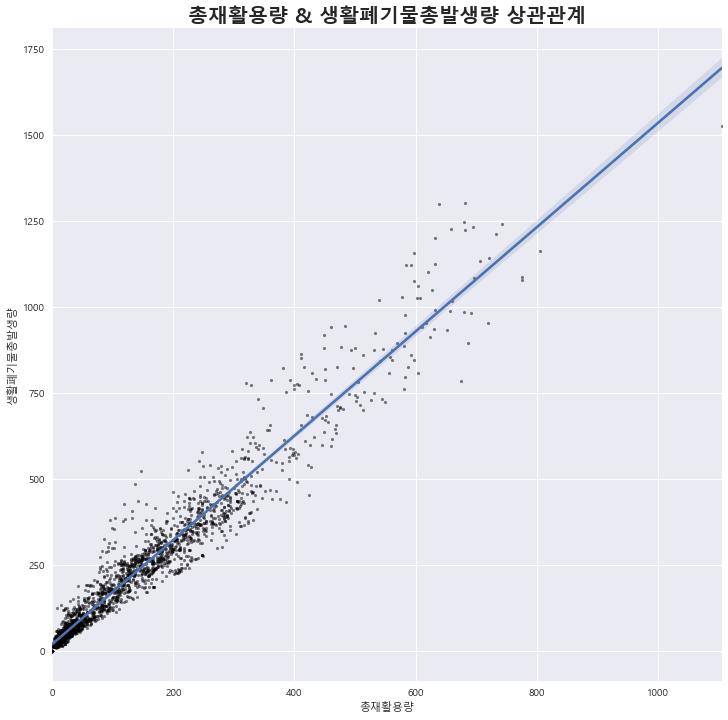

In [384]:
# 데이터 분포 - 총재활용량 & 생활폐기물총발생량 상관관계

plt.figure(figsize=(12, 12))

sns.regplot(x=df["총재활용량"], y=df["생활폐기물총발생량"], fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10})

plt.title('총재활용량 & 생활폐기물총발생량 상관관계', fontsize=20, weight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.show()

##### 시도별 연도별 추세

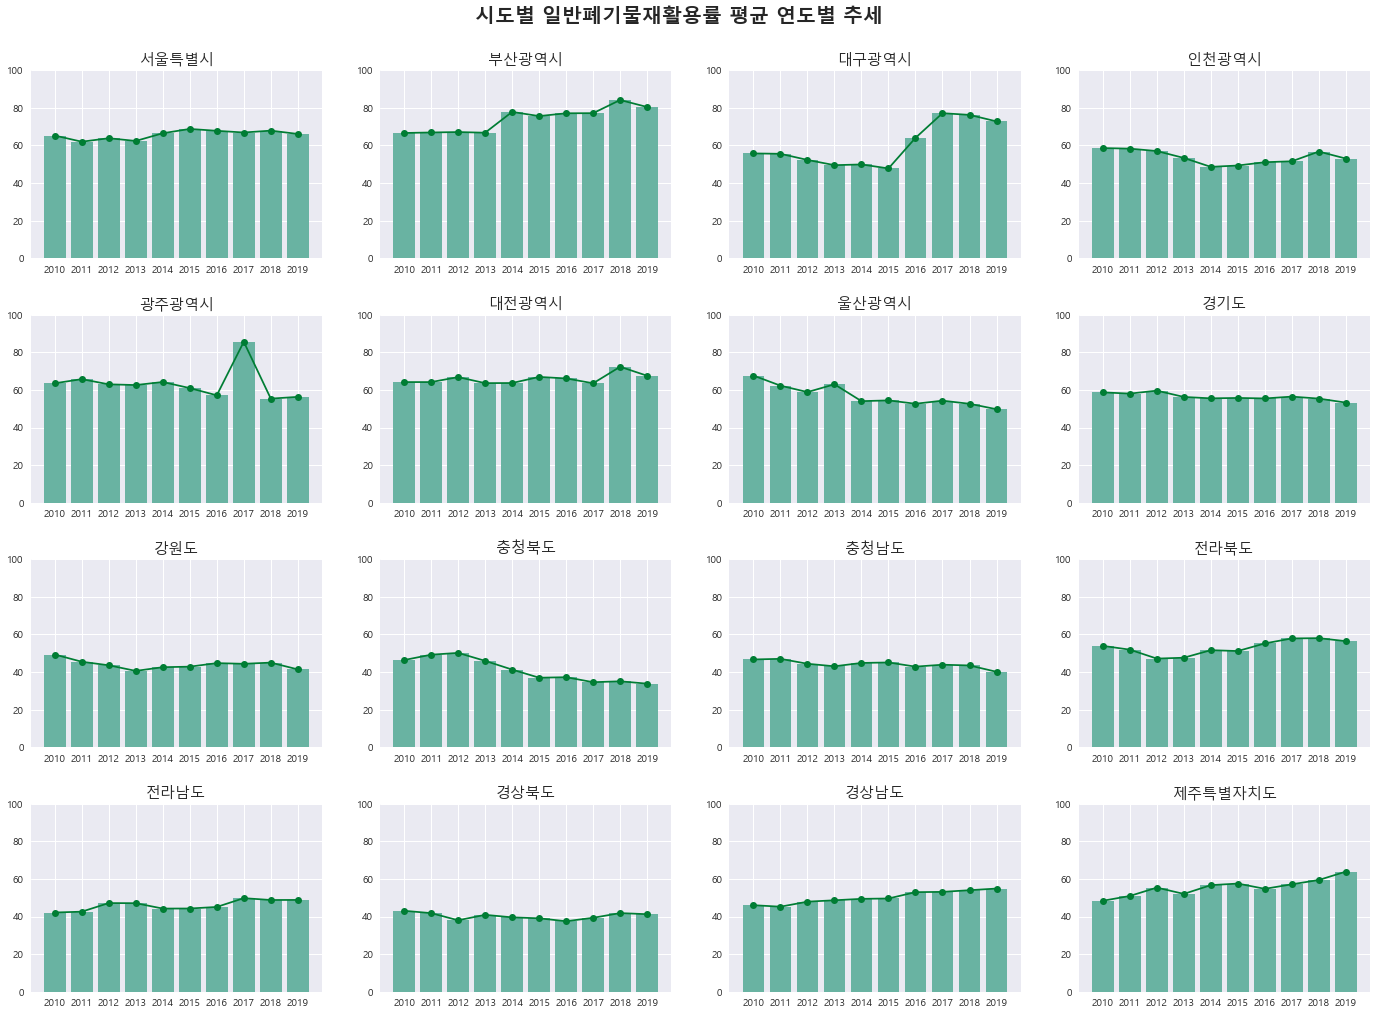

In [284]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['일반폐기물재활용률'], color='#69b3a2')
    axs[ax, ay].plot(df_temp['year'], df_temp['일반폐기물재활용률'], color='#007d34', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 101, 20)))
    axs[ax, ay].set_xticks(list(df['year'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 일반폐기물재활용률 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

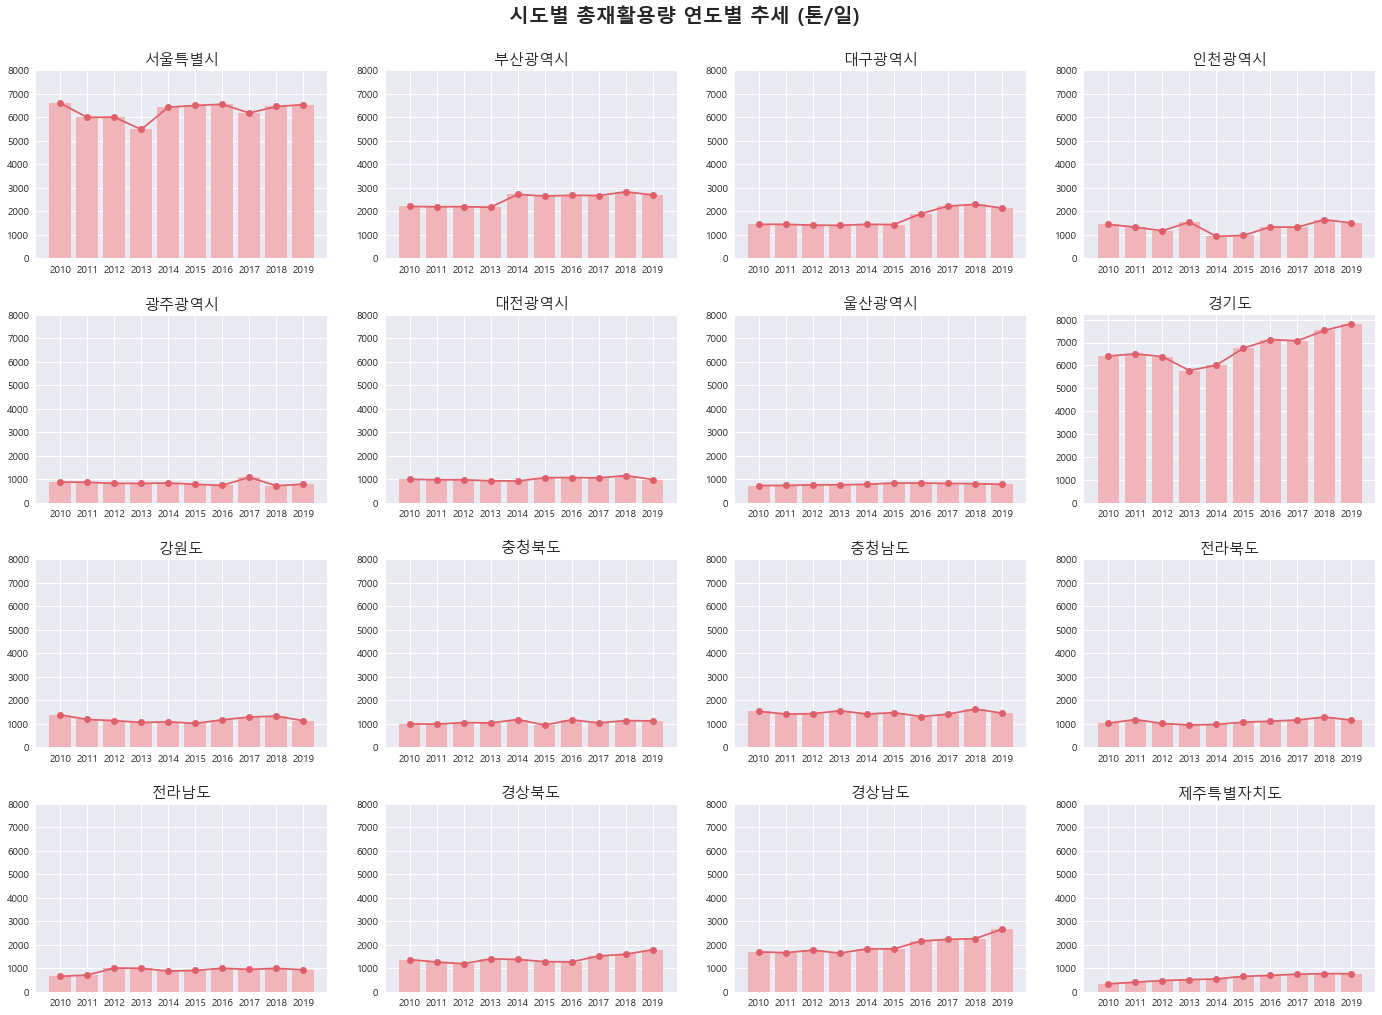

In [283]:
# 시도별 총재활용량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['총재활용량'], color='#f0b5ba')
    axs[ax, ay].plot(df_temp['year'], df_temp['총재활용량'], color='#df5f6a', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 8001, 1000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 총재활용량 연도별 추세 (톤/일)', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

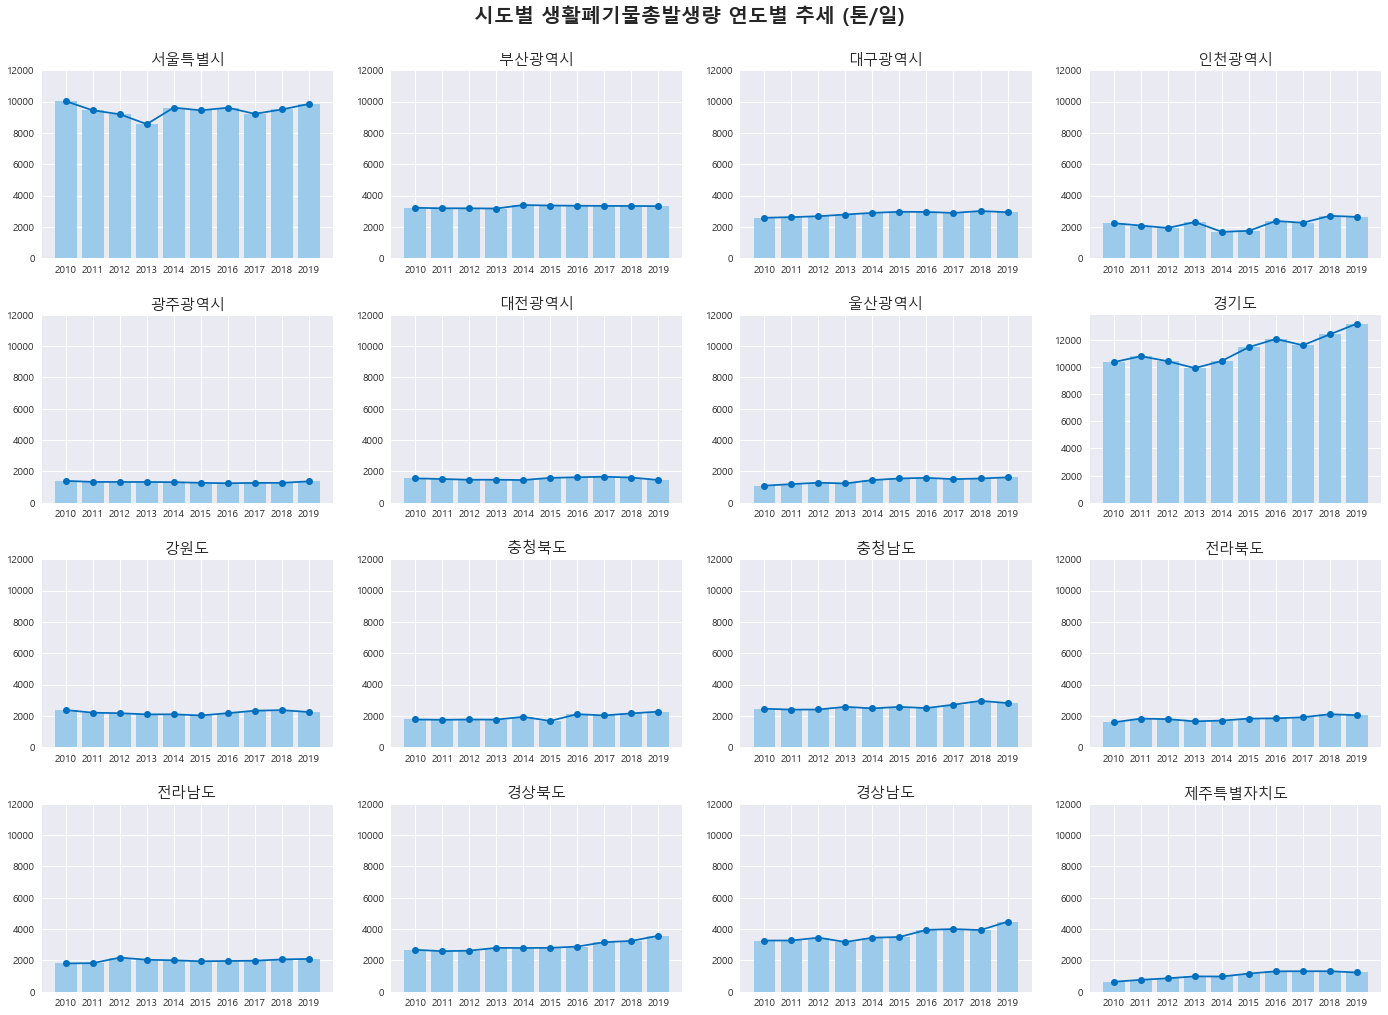

In [285]:
# 시도별 생활폐기물총발생량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['생활폐기물총발생량'], color='#9bcaeb')
    axs[ax, ay].plot(df_temp['year'], df_temp['생활폐기물총발생량'], color='#006fbe', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 14000, 2000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 생활폐기물총발생량 연도별 추세 (톤/일)', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

<ipython-input-401-428b58544110>:30: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001AA982A2790>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([pl1, pl2, pl3],["HHZ 1", "HHN", "HHE"])
<ipython-input-401-428b58544110>:30: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001AA982A5040>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([pl1, pl2, pl3],["HHZ 1", "HHN", "HHE"])
<ipython-input-401-428b58544110>:30: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001AA9829D160>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-a

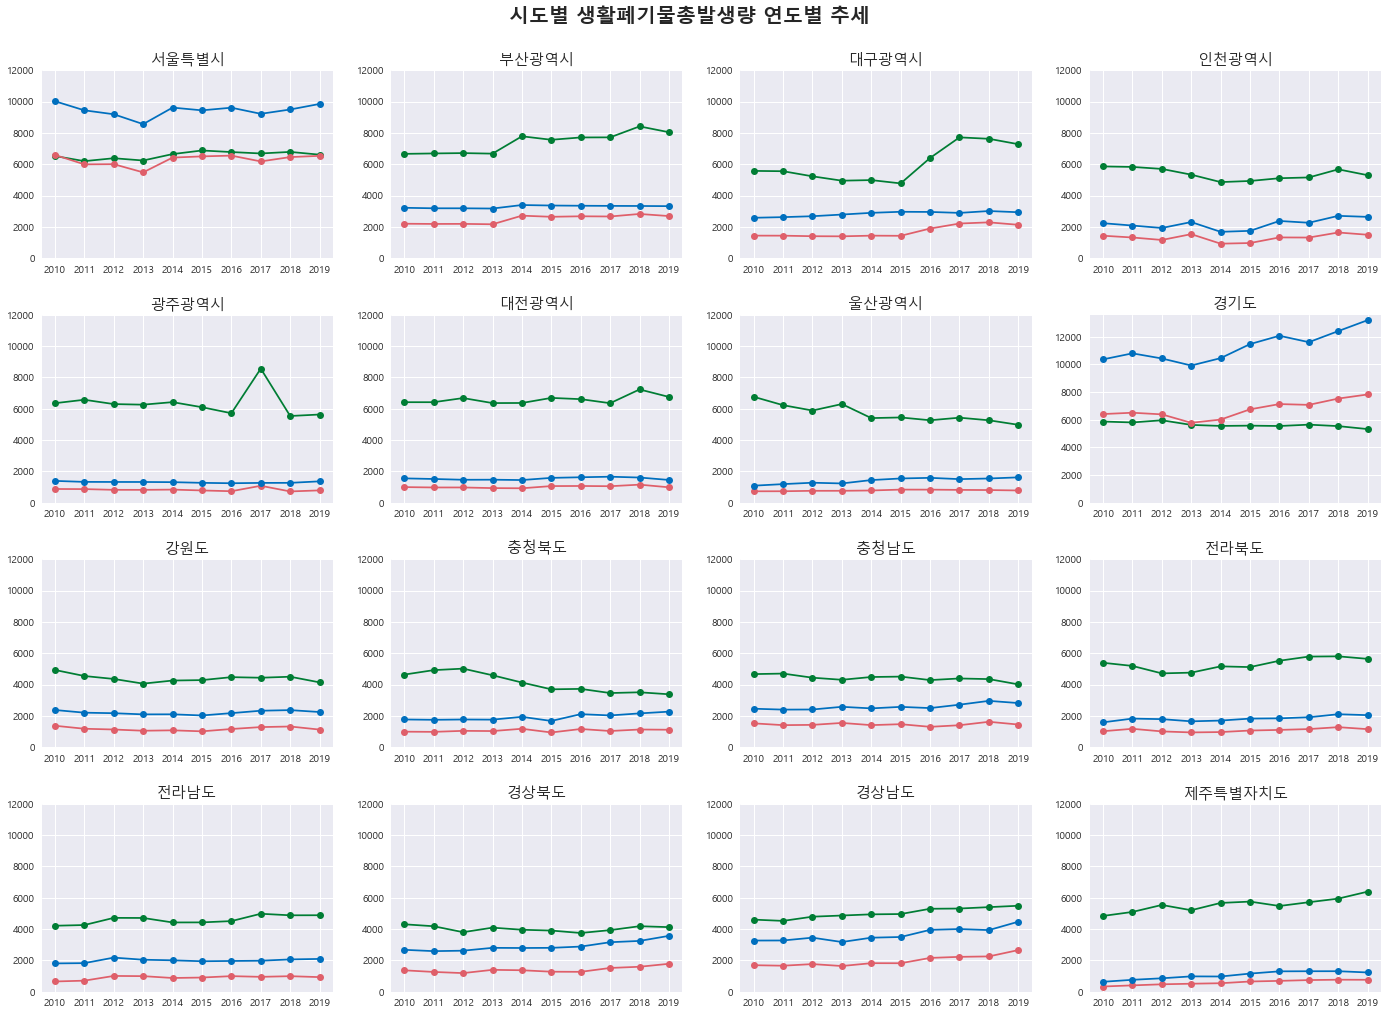

In [401]:
# 시도별 '일반폐기물재활용률', '총재활용량', '생활폐기물총발생량' 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp_1 = df[sido_condition].groupby(df['year'])[['총재활용량', '생활폐기물총발생량']].sum().reset_index()
    df_temp_2 = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    pl1 = axs[ax, ay].plot(df_temp_2['year'], df_temp_2['일반폐기물재활용률']*100, color='#007d34', marker='o')
    pl2 = axs[ax, ay].plot(df_temp_1['year'], df_temp_1['총재활용량'], color='#df5f6a', marker='o')
    pl3 = axs[ax, ay].plot(df_temp_1['year'], df_temp_1['생활폐기물총발생량'], color='#006fbe', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 14000, 2000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 생활폐기물총발생량 연도별 추세', fontsize=20, weight='bold')
plt.legend([pl1, pl2, pl3],["HHZ 1", "HHN", "HHE"])
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

## 주민_1인당_생활폐기물배출량(10-19)

### 1.0 데이터 불러오기

In [ ]:
df = pd.read_csv(get_file_dir('refined','주민_1인당_생활폐기물배출량(10-19).csv'))

### 2.0 데이터 탐색 및 전처리

In [ ]:
df.info() 

# Not-null, 2520 ROW
# 행정구역별(1), (2)          object
# year (연도)             int64
# 일반폐기물재활용률(%)      object -> float
# 총재활용량(톤/일)         object -> float
# 생활폐기물총발생량(톤/일)  object -> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9830 entries, 0 to 9829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   행정구역별           9830 non-null   object
 1   year            9830 non-null   int64 
 2   주민1인당 생활폐기물배출량  9830 non-null   object
 3   생활폐기물발생량        9830 non-null   object
 4   주민등록인구          9830 non-null   object
dtypes: int64(1), object(4)
memory usage: 384.1+ KB


##### 결측치 탐색 및 처리

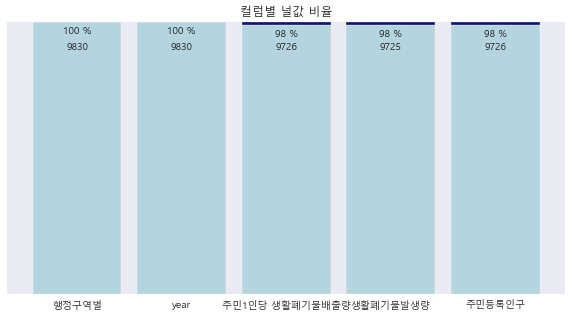

In [ ]:
# 결측치 탐색 - 널값 비율 그래프

# Data
row = [0,1,2,3,4] # for X row

null_dict = {'notnull': [df['행정구역별'].count(), df['year'].count(), 
                          df['주민1인당 생활폐기물배출량'].count(), df['생활폐기물발생량'].count(), df['주민등록인구'].count()],
              'isnull' : [df['행정구역별'].isnull().sum(), df['year'].isnull().sum(),
                          df['주민1인당 생활폐기물배출량'].isnull().sum(), df['생활폐기물발생량'].isnull().sum(), df['주민등록인구'].isnull().sum()]}

null_df = pd.DataFrame(null_dict)
 
# From raw value to percentage
data_totals = [i+j for i,j in zip(null_df['notnull'], null_df['isnull'])]
data_notnull = [i / j * 100 for i,j in zip(null_df['notnull'], data_totals)]
data_isnull = [i / j * 100 for i,j in zip(null_df['isnull'], data_totals)]
 
# plot
plt.figure(figsize=(10, 5))
barWidth = 0.85

# Create train bars
plot1 = plt.bar(row, data_notnull, color='#B4D4DF', edgecolor='white', width=barWidth)
plt.bar(row, data_isnull, bottom=data_notnull, color='#11117A', edgecolor='white', width=barWidth)


# Custom x axis
names = ('행정구역별','year','주민1인당 생활폐기물배출량','생활폐기물발생량', '주민등록인구')
plt.xticks(row, names)

for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             0.95*height,'%d %%' % int(height), ha='center', va='bottom')

i = 0
for value in plot1:
    data_value = null_df['notnull'][i]
    plt.text(value.get_x() + value.get_width()/2.,
             0.90*height,'%d' % int(data_value), ha='center', va='bottom')
    i += 1

# Hide spines and ticks
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)

# Title
plt.title("컬럼별 널값 비율")

# Show graphic
plt.show()

In [ ]:
# 모두 동일한 ROW에 54개 존재: 신설된 시군구로 인해 결즉치 발생 추측

# 결측치 정책: 0으로 대치

df.fillna(0, inplace=True)

df.isnull().sum()

행정구역별             0
year              0
주민1인당 생활폐기물배출량    0
생활폐기물발생량          0
주민등록인구            0
dtype: int64

##### 기술통계

In [ ]:
# 기술통계

df_describe = df.describe()
df_describe.loc['median'] = df[df['year']==2010].median() # 중앙값 추가
df_describe

,주민1인당 생활폐기물배출량,생활폐기물발생량,주민등록인구
count,9830.000000,9830.000000,9.830000e+03
mean,1.247945,289.695209,2.668045e+05
std,0.668210,544.209066,5.745175e+05
min,0.000000,0.000000,0.000000e+00
25%,0.900000,117.400000,9.544800e+04
50%,1.100000,230.100000,1.919920e+05
75%,1.300000,324.300000,3.129370e+05
max,5.900000,13196.900000,1.323967e+07
median,1.000000,207.400000,2.010000e+05


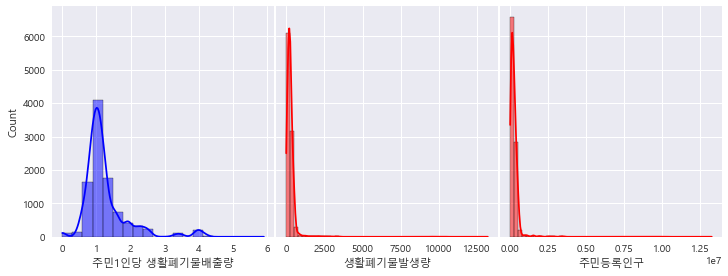

In [ ]:
# 총재활용량, 생활폐기물총발생량 히스토그램

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sns.histplot(data=df, x="주민1인당 생활폐기물배출량", kde=True, color="blue", ax=axes[0], bins=20)
sns.histplot(data=df, x="생활폐기물발생량", kde=True, color="red", ax=axes[1], bins=50)
sns.histplot(data=df, x="주민등록인구", kde=True, color="red", ax=axes[2], bins=50)
fig.subplots_adjust(top=0.925, wspace=0.01)
plt.show()

In [ ]:
# 연도별 기술통계량 함수

def get_describe(year): 
    df_describe = df[df['year']==year].describe()
    df_describe.loc['median'] = df[df['year']==year].median() # 중앙값 추가
    return df_describe

get_describe(2010)

,주민1인당 생활폐기물배출량,생활폐기물발생량,주민등록인구
count,983.000000,983.000000,9.830000e+02
mean,1.251984,286.004476,2.675861e+05
std,0.698627,525.248993,5.627443e+05
min,0.000000,0.000000,0.000000e+00
25%,0.900000,126.600000,9.479100e+04
50%,1.000000,207.400000,2.010000e+05
75%,1.300000,339.700000,3.122180e+05
max,4.000000,10362.400000,1.178662e+07
median,1.000000,207.400000,2.010000e+05


In [ ]:
df['행정구역별']

0         서울특별시
1           종로구
2            중구
3            중구
4            중구
         ...   
9825        거창군
9826        합천군
9827    제주특별자치도
9828        제주시
9829       서귀포시
Name: 행정구역별, Length: 9830, dtype: object

In [ ]:
df['행정구역별'][0] in ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

True

In [ ]:
df_sido = df[df['행정구역별'].isin(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'])]
df_sido

,행정구역별,year,주민1인당 생활폐기물배출량,생활폐기물발생량,주민등록인구
0,서울특별시,2010,1.0,10020.4,10312545
248,부산광역시,2010,0.9,3221.9,3567910
789,대구광역시,2010,1.0,2584.8,2511676
793,인천광역시,2010,0.8,2317.4,2758296
801,광주광역시,2010,1.0,1396.9,1454636
...,...,...,...,...,...
9747,전라북도,2019,1.1,2050.6,1818917
9762,전라남도,2019,1.1,2097.8,1868745
9785,경상북도,2019,1.3,3569.4,2665836
9809,경상남도,2019,1.3,4471.8,3362553


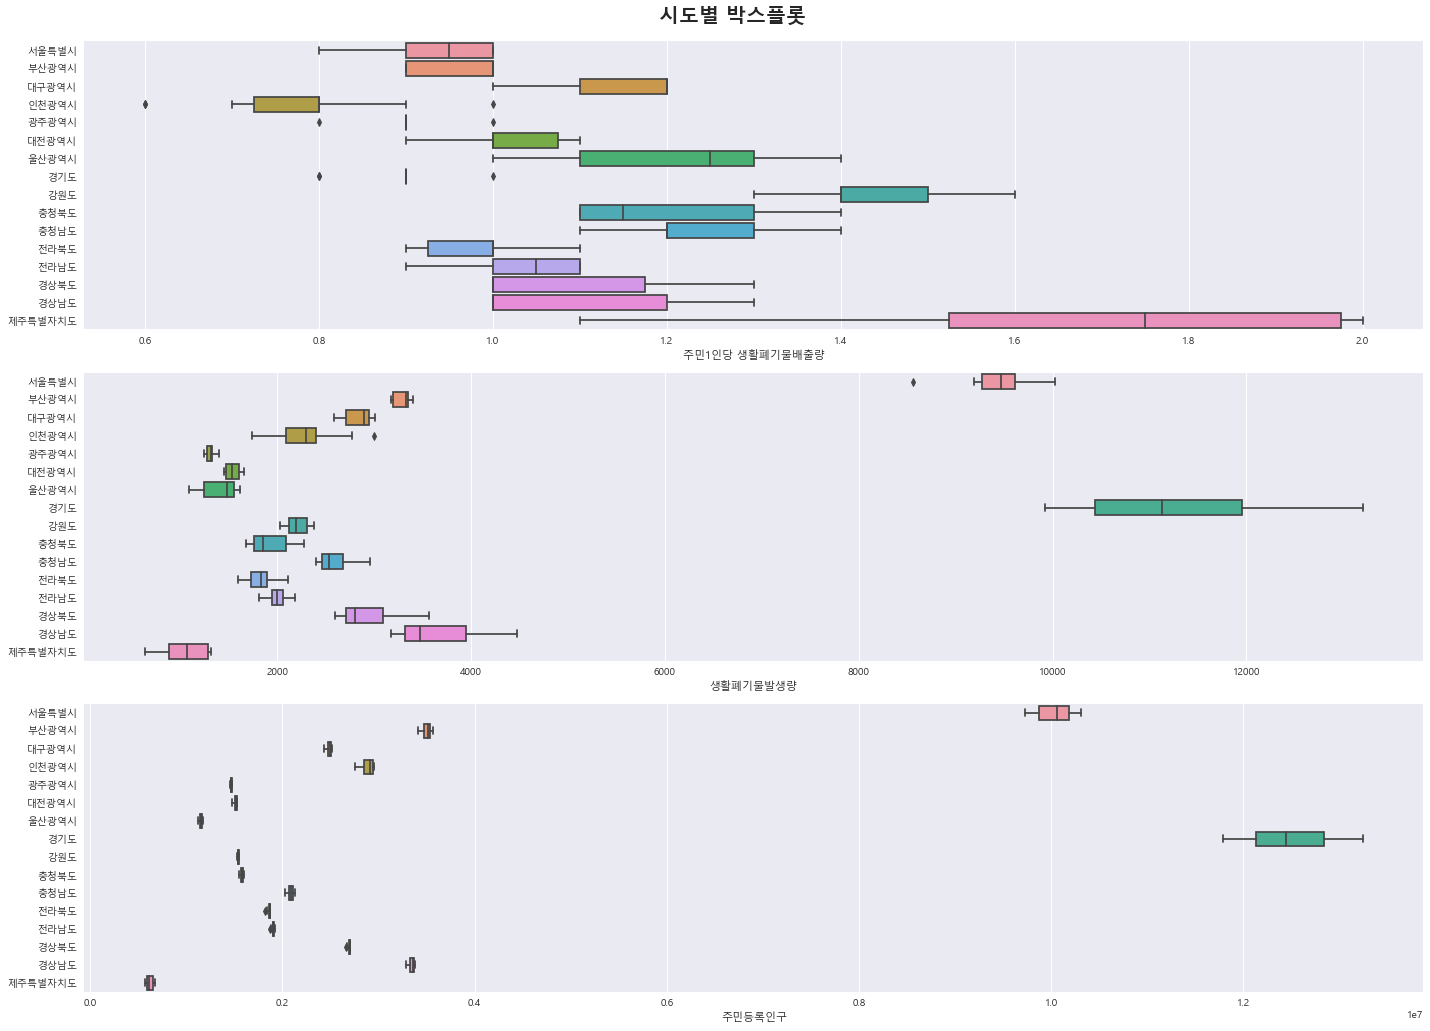

,주민1인당 생활폐기물배출량,생활폐기물발생량,주민등록인구
count,160.000000,160.000000,1.600000e+02
mean,1.101250,3224.330000,3.197297e+06
std,0.246991,2831.599966,3.181020e+06
min,0.600000,638.800000,5.712550e+05
25%,0.900000,1649.350000,1.532560e+06
50%,1.000000,2262.650000,1.973631e+06
75%,1.200000,3179.400000,3.040404e+06
max,2.000000,13196.900000,1.323967e+07


In [ ]:
# 시도별 박스플롯

def get_box_plot():
    fig, axes = plt.subplots(3, 1, figsize=(24,16))
    sns.boxplot(x='주민1인당 생활폐기물배출량', y='행정구역별', data=df_sido, ax = axes[0])
    sns.boxplot(x='생활폐기물발생량', y='행정구역별', data=df_sido, ax = axes[1])
    sns.boxplot(x='주민등록인구', y='행정구역별', data=df_sido, ax = axes[2])
    plt.suptitle('시도별 박스플롯', fontsize=20, weight='bold')
    fig.subplots_adjust(top=0.95, hspace=0.15)
    
    for ax in axes:
        ax.set(ylabel=None)

    plt.show()
    return df_sido.describe()

get_box_plot()

##### 이상치 탐색

### 3.0 시각적 EDA

In [ ]:
# 상관관계 탐색

df.corr()

# 생활폐기물총발생량과 주민등록인구는 뚜렷한 상관관계를 가짐.
# 주민1인당 생활폐기물배출량 = 생활폐기물총발생량 / 주민등록인구

,주민1인당 생활폐기물배출량,생활폐기물발생량,주민등록인구
주민1인당 생활폐기물배출량,1.000000,-0.019823,-0.082499
생활폐기물발생량,-0.019823,1.000000,0.956078
주민등록인구,-0.082499,0.956078,1.000000


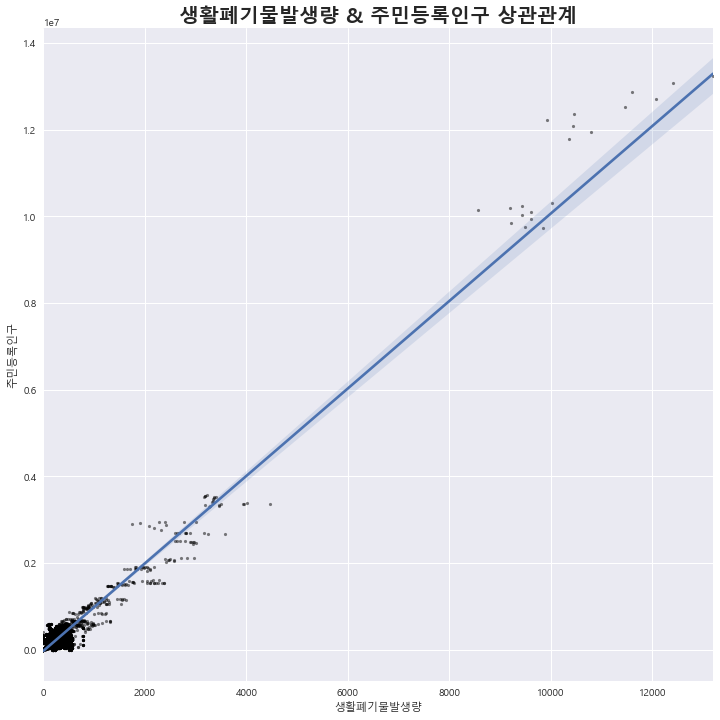

In [ ]:
# 데이터 분포 - 총재활용량 & 생활폐기물총발생량 상관관계

plt.figure(figsize=(12, 12))

sns.regplot(x=df["생활폐기물발생량"], y=df["주민등록인구"], fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10})

plt.title('생활폐기물발생량 & 주민등록인구 상관관계', fontsize=20, weight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.show()

##### 시도별 연도별 추세

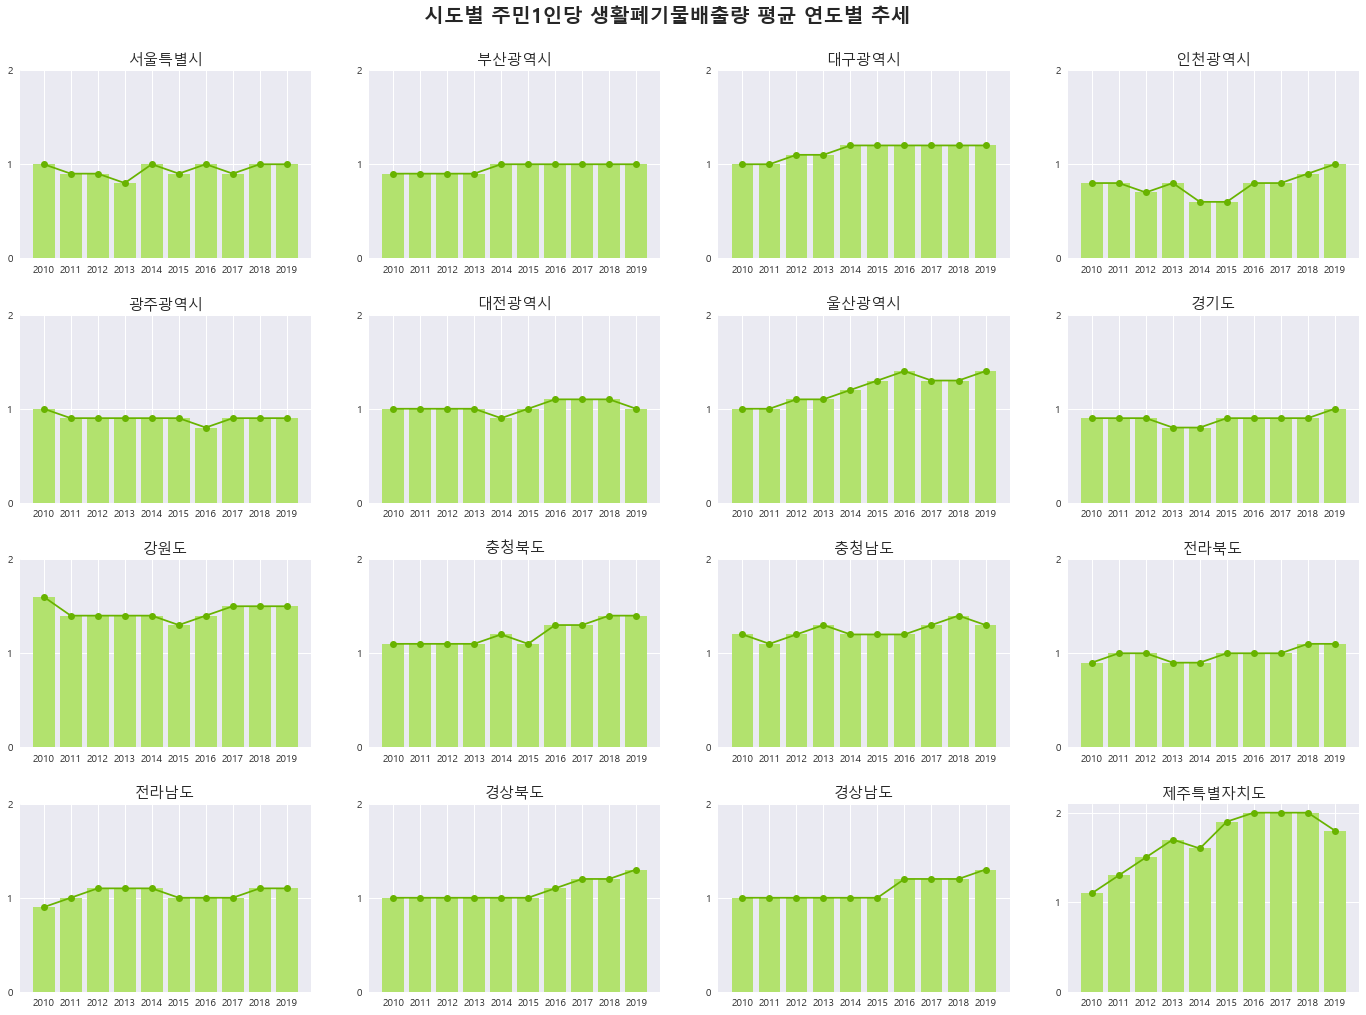

In [ ]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['행정구역별'].unique():
    sido_condition = df_sido['행정구역별']== i
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['year'])[['주민1인당 생활폐기물배출량', '생활폐기물발생량', '주민등록인구']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['year'], df_sido_temp['주민1인당 생활폐기물배출량'], color='#b2e26e')
    axs[ax, ay].plot(df_sido_temp['year'], df_sido_temp['주민1인당 생활폐기물배출량'], color='#68b300', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 3, 1)))
    axs[ax, ay].set_xticks(list(df_sido['year'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 주민1인당 생활폐기물배출량 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

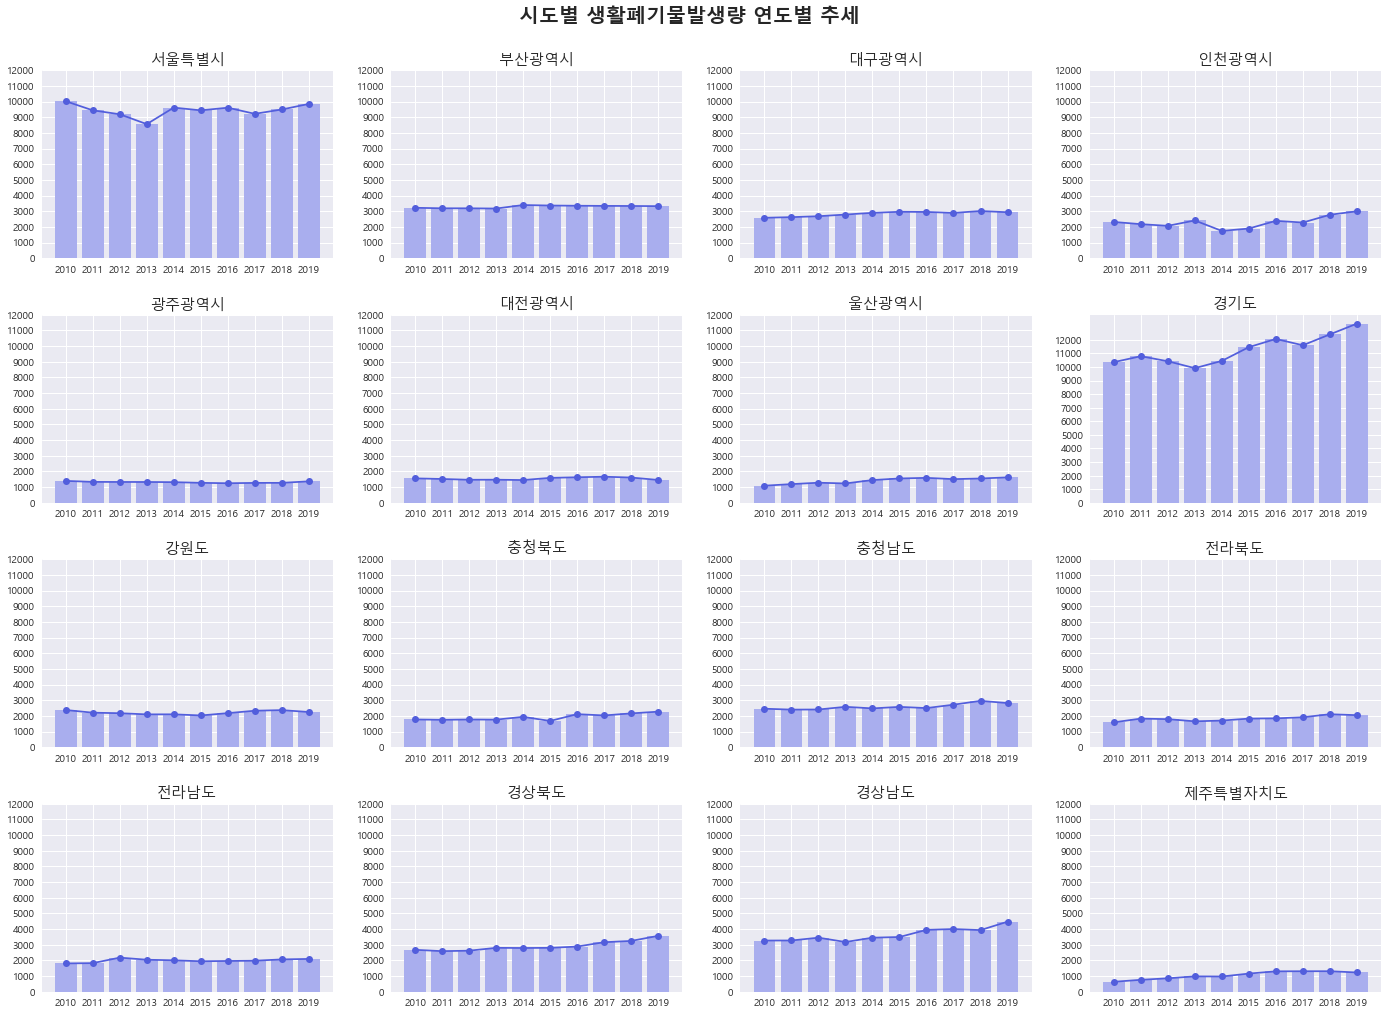

In [ ]:
# 시도별 생활폐기물발생량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['행정구역별'].unique():
    sido_condition = df_sido['행정구역별']== i
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['year'])[['주민1인당 생활폐기물배출량', '생활폐기물발생량', '주민등록인구']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['year'], df_sido_temp['생활폐기물발생량'], color='#eaba98')
    axs[ax, ay].plot(df_sido_temp['year'], df_sido_temp['생활폐기물발생량'], color='#d36d24', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 12001, 1000)))
    sax.set_xticks(list(df_sido['year'].unique()))

plt.suptitle('시도별 생활폐기물발생량 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

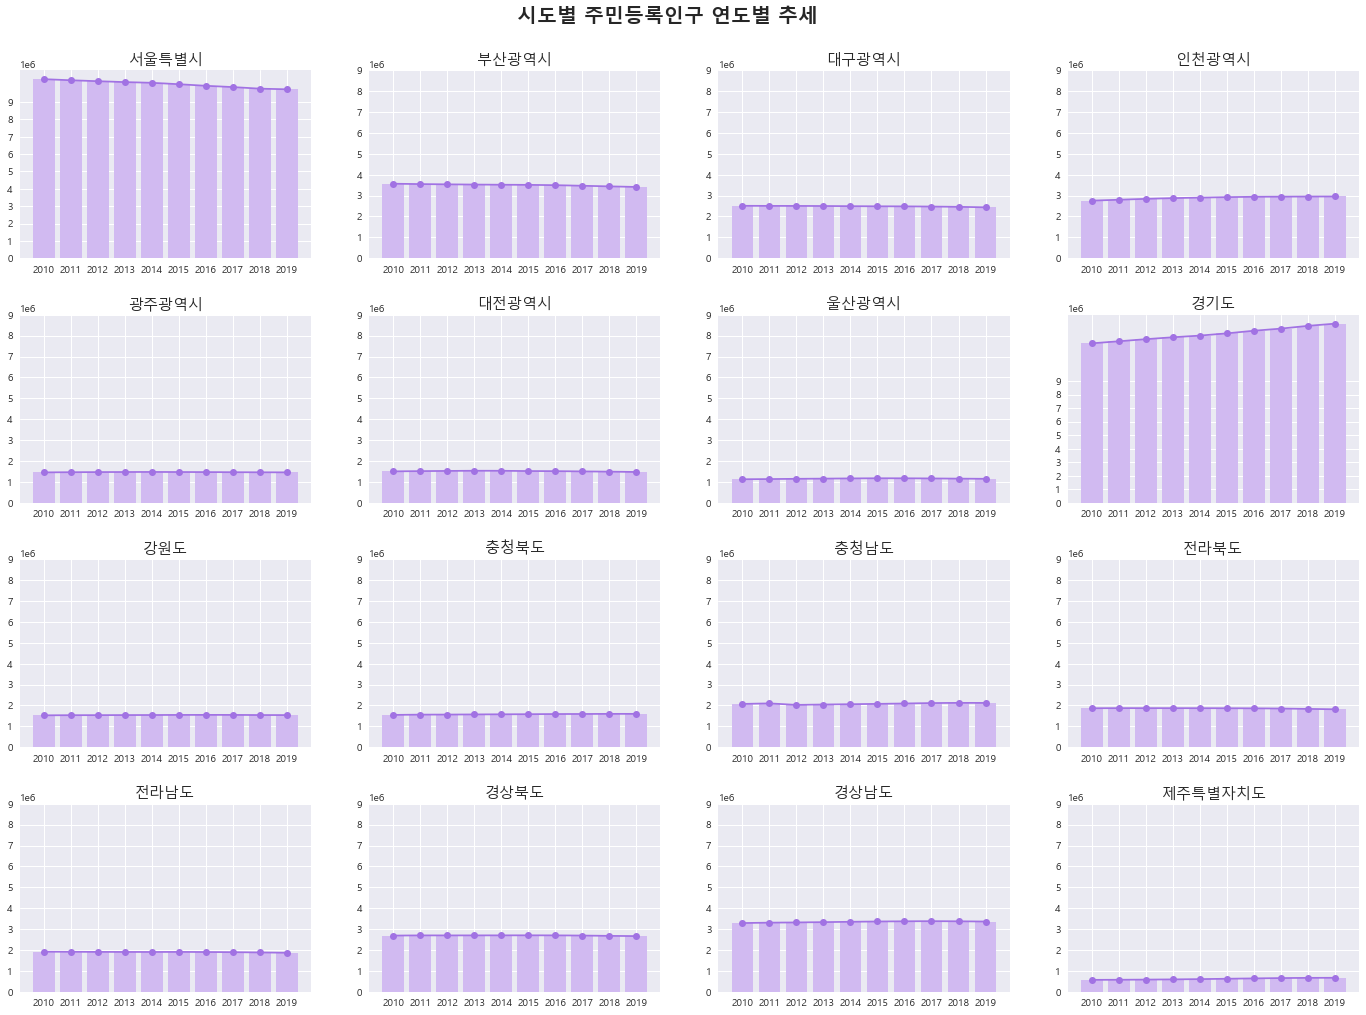

In [ ]:
# 시도별 주민등록인구 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['행정구역별'].unique():
    sido_condition = df_sido['행정구역별']== i
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['year'])[['주민1인당 생활폐기물배출량', '생활폐기물발생량', '주민등록인구']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['year'], df_sido_temp['주민등록인구'], color='#d1baf1')
    axs[ax, ay].plot(df_sido_temp['year'], df_sido_temp['주민등록인구'], color='#a172e3', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 10000000, 1000000)))
    sax.set_xticks(list(df_sido['year'].unique()))

plt.suptitle('시도별 주민등록인구 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

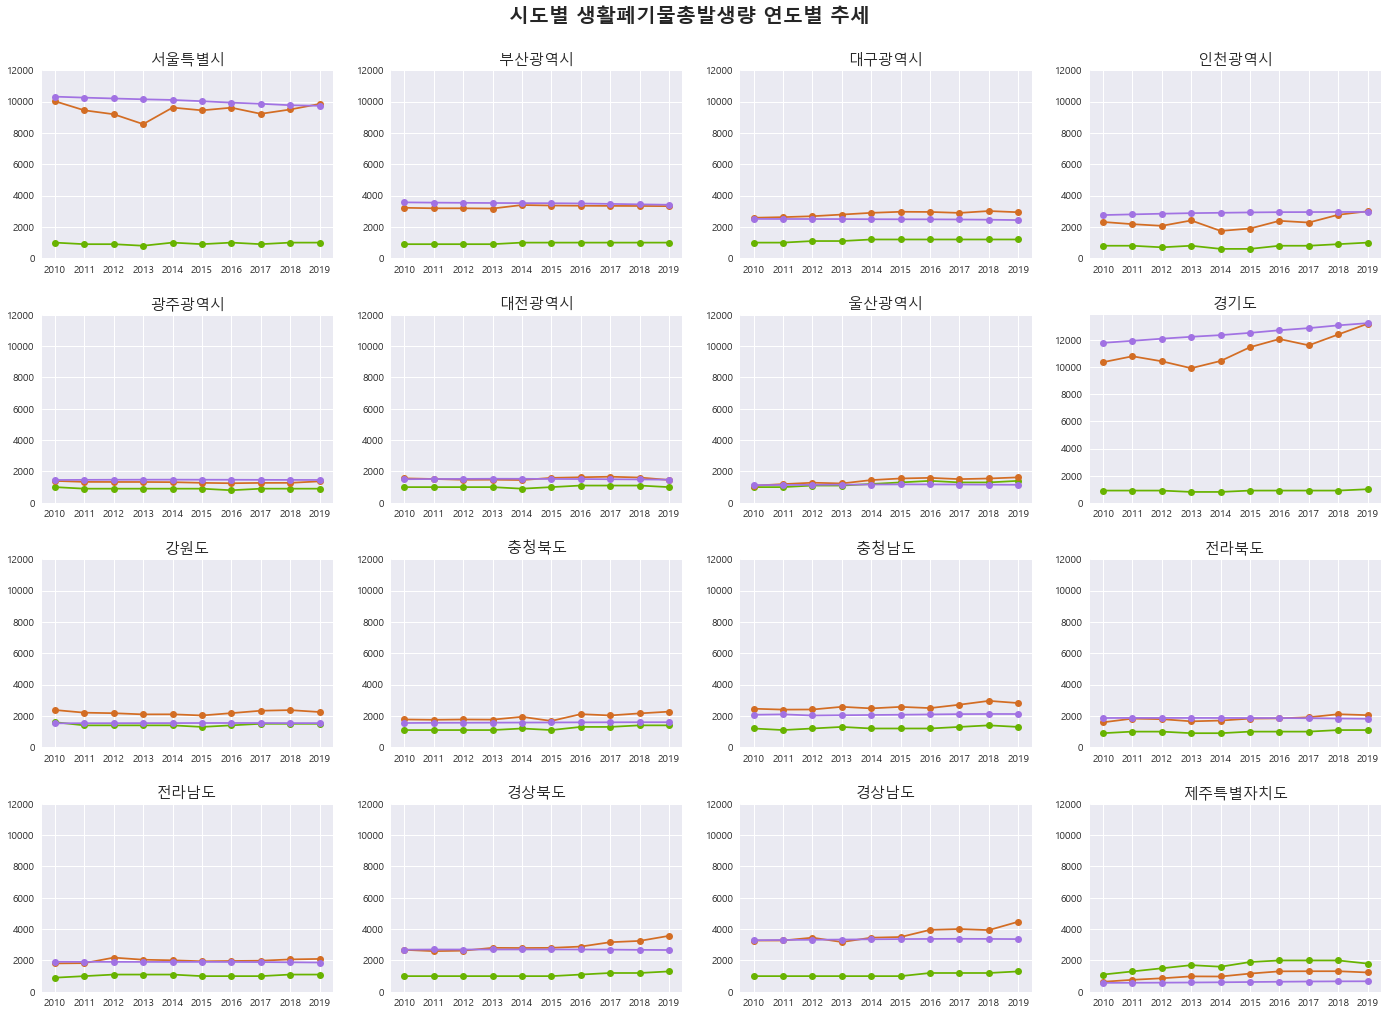

In [ ]:
# 시도별 '일반폐기물재활용률', '총재활용량', '생활폐기물총발생량' 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['행정구역별'].unique():
    sido_condition = df_sido['행정구역별']== i
    df_sido_temp_1 = df_sido[sido_condition].groupby(df_sido['year'])[['생활폐기물발생량', '주민등록인구']].sum().reset_index()
    df_sido_temp_2 = df_sido[sido_condition].groupby(df_sido['year'])[['주민1인당 생활폐기물배출량']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    pl1 = axs[ax, ay].plot(df_sido_temp_2['year'], df_sido_temp_2['주민1인당 생활폐기물배출량']*1000, color='#68b300', marker='o')
    pl2 = axs[ax, ay].plot(df_sido_temp_1['year'], df_sido_temp_1['생활폐기물발생량'], color='#d36d24', marker='o')
    pl3 = axs[ax, ay].plot(df_sido_temp_1['year'], df_sido_temp_1['주민등록인구']/1000, color='#a172e3', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 14000, 2000)))
    sax.set_xticks(list(df_sido['year'].unique()))

plt.suptitle('시도별 생활폐기물총발생량 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

## 폐기물 재활용실적 및 업체현황(10-19)

### 1.0 데이터 불러오기

In [627]:
df = pd.read_csv(get_file_dir('refined','폐기물 재활용실적 및 업체현황(10-19).csv'), encoding='CP949')

### 2.0 데이터 탐색 및 전처리

In [628]:
df.info() 

# Not-null, 2520 ROW

# 행정구역별(1), (2)          object
# year (연도)             int64
# 가동업체수        object -> float
# 재활용 폐기물량    object -> float
# 판매량            object -> float
# 판매총액          object -> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216 entries, 0 to 12215
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        12216 non-null  object 
 1   연도        12216 non-null  int64  
 2   폐기물 소분류   12216 non-null  object 
 3   분류        12216 non-null  object 
 4   가동업체수     12216 non-null  int64  
 5   재활용 폐기물량  12216 non-null  float64
 6   판매량       12216 non-null  int64  
 7   판매총액      12216 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 763.6+ KB


##### 결측치 탐색 및 처리

In [629]:
df.isnull().sum()

지역          0
연도          0
폐기물 소분류     0
분류          0
가동업체수       0
재활용 폐기물량    0
판매량         0
판매총액        0
dtype: int64

##### 데이터 타입 변환

##### 기술통계

In [630]:
# 기술통계

df_describe = df.describe()
df_describe.loc['median'] = df[df['연도']==2010].median() # 중앙값 추가
df_describe

,연도,가동업체수,재활용 폐기물량,판매량,판매총액
count,12216.000000,12216.000000,1.221600e+04,1.221600e+04,1.221600e+04
mean,2013.953995,9.130812,3.960316e+04,2.991526e+04,1.869542e+08
std,2.979259,37.405603,2.055006e+05,1.914648e+05,5.452204e+09
min,2010.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2011.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2013.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2017.000000,5.000000,5.989500e+03,1.955000e+03,1.789996e+03
max,2019.000000,1313.000000,6.317826e+06,7.156673e+06,3.355096e+11
median,2010.000000,2.000000,4.545000e+02,2.100000e+01,0.000000e+00


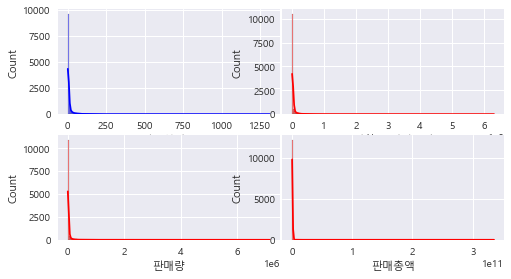

In [631]:
# 총재활용량, 생활폐기물총발생량 히스토그램

fig, axes = plt.subplots(2, 2, figsize=(8, 4))
sns.histplot(data=df, x="가동업체수", kde=True, color="blue", ax=axes[0,0], bins=200)
sns.histplot(data=df, x="재활용 폐기물량", kde=True, color="red", ax=axes[0,1], bins=200)
sns.histplot(data=df, x="판매량", kde=True, color="red", ax=axes[1,0], bins=200)
sns.histplot(data=df, x="판매총액", kde=True, color="red", ax=axes[1,1], bins=200)
fig.subplots_adjust(top=0.925, wspace=0.01)
plt.show()

In [632]:
def get_describe(연도):
    df_describe = df[df['연도']==연도].describe()
    df_describe.loc['median'] = df[df['연도']==연도].median() # 중앙값 추가
    return df_describe

get_describe(2010)

,연도,가동업체수,재활용 폐기물량,판매량,판매총액
count,1322.0,1322.000000,1.322000e+03,1.322000e+03,1.322000e+03
mean,2010.0,14.506808,4.788673e+04,3.819351e+04,1.718130e+09
std,0.0,53.197634,2.160924e+05,2.196083e+05,1.649978e+10
min,2010.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2010.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2010.0,2.000000,4.545000e+02,2.100000e+01,0.000000e+00
75%,2010.0,9.000000,1.211175e+04,6.113750e+03,4.670409e+06
max,2010.0,1268.000000,4.541758e+06,5.306516e+06,3.355096e+11
median,2010.0,2.000000,4.545000e+02,2.100000e+01,0.000000e+00


In [634]:
df_sido = df[df['지역'].isin(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'])]
df_sido

,지역,연도,폐기물 소분류,분류,가동업체수,재활용 폐기물량,판매량,판매총액
0,강원도,2019,유기성오니류,허가업체,68,436844.0,36906,3.264900e+02
1,강원도,2019,무기성오니류,허가업체,31,1009937.0,361541,2.603099e+04
2,강원도,2019,폐합성고분자화합물,허가업체,90,852900.0,170449,2.380120e+04
3,강원도,2019,광재류,허가업체,6,104067.0,75769,0.000000e+00
4,강원도,2019,분진류,허가업체,7,35391.0,0,0.000000e+00
...,...,...,...,...,...,...,...,...
12211,제주특별자치도,2010,폐지류,신고업체,4,5991.0,3065,3.197143e+08
12212,제주특별자치도,2010,고철 및 금속캔류,신고업체,4,4611.0,3123,3.740043e+08
12213,제주특별자치도,2010,폐합성수지,신고업체,1,127.0,127,0.000000e+00
12214,제주특별자치도,2010,유리병,신고업체,1,33.0,33,0.000000e+00


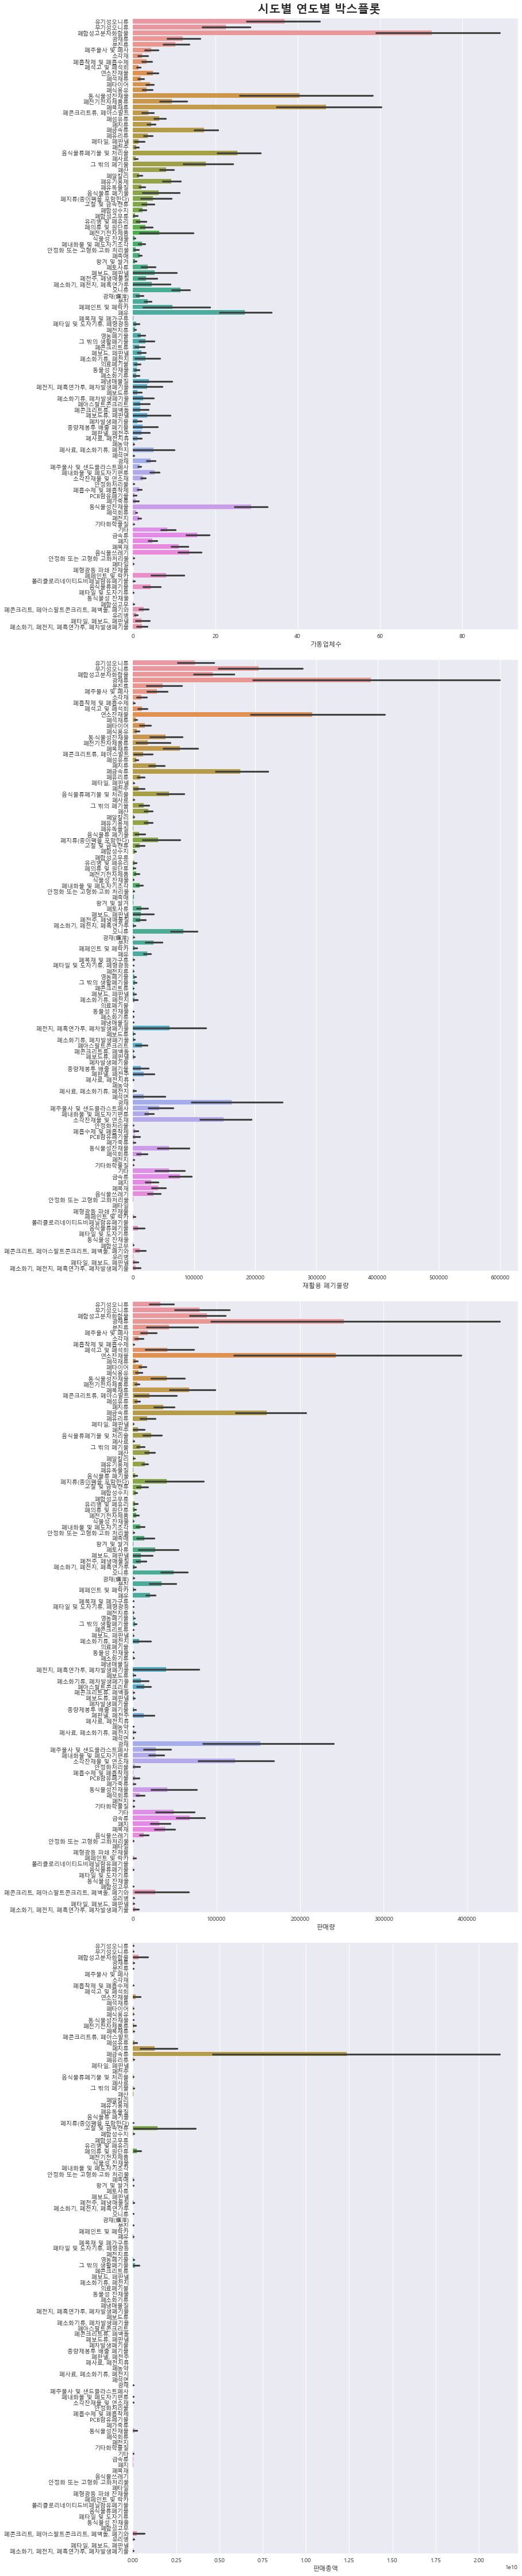

,연도,가동업체수,재활용 폐기물량,판매량,판매총액
count,11690.000000,11690.000000,1.169000e+04,1.169000e+04,1.169000e+04
mean,2013.991446,9.468520,4.114652e+04,3.098529e+04,1.928681e+08
std,2.999802,38.189989,2.099013e+05,1.955640e+05,5.567007e+09
min,2010.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2011.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2013.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2017.000000,5.000000,6.725750e+03,2.195750e+03,2.261611e+03
max,2019.000000,1313.000000,6.317826e+06,7.156673e+06,3.355096e+11


In [635]:
# 시도별 연도별 박스플롯
from numpy import mean

def get_box_plot():
    fig, axes = plt.subplots(4, 1, figsize=(12,72))
    sns.barplot(x='가동업체수', y='폐기물 소분류', data=df_sido, ax = axes[0], estimator=mean)
    sns.barplot(x='재활용 폐기물량', y='폐기물 소분류', data=df_sido, ax = axes[1], estimator=mean)
    sns.barplot(x='판매량', y='폐기물 소분류', data=df_sido, ax = axes[2], estimator=mean)
    sns.barplot(x='판매총액', y='폐기물 소분류', data=df_sido, ax = axes[3], estimator=mean)
    plt.suptitle('시도별 연도별 박스플롯', fontsize=20, weight='bold')
    fig.subplots_adjust(top=0.975, hspace=0.05)
    
    for ax in axes:
        ax.set(ylabel=None)

    plt.show()
    return df_sido.describe()

get_box_plot()


In [638]:
# 상관관계 탐색

df.corr()

# 생활폐기물총발생량과 주민등록인구는 뚜렷한 상관관계를 가짐.
# 주민1인당 생활폐기물배출량 = 생활폐기물총발생량 / 주민등록인구

,연도,가동업체수,재활용 폐기물량,판매량,판매총액
연도,1.000000,-0.002747,0.017188,0.041248,-0.045203
가동업체수,-0.002747,1.000000,0.372753,0.272617,0.018282
재활용 폐기물량,0.017188,0.372753,1.000000,0.778512,0.072373
판매량,0.041248,0.272617,0.778512,1.000000,0.060663
판매총액,-0.045203,0.018282,0.072373,0.060663,1.000000


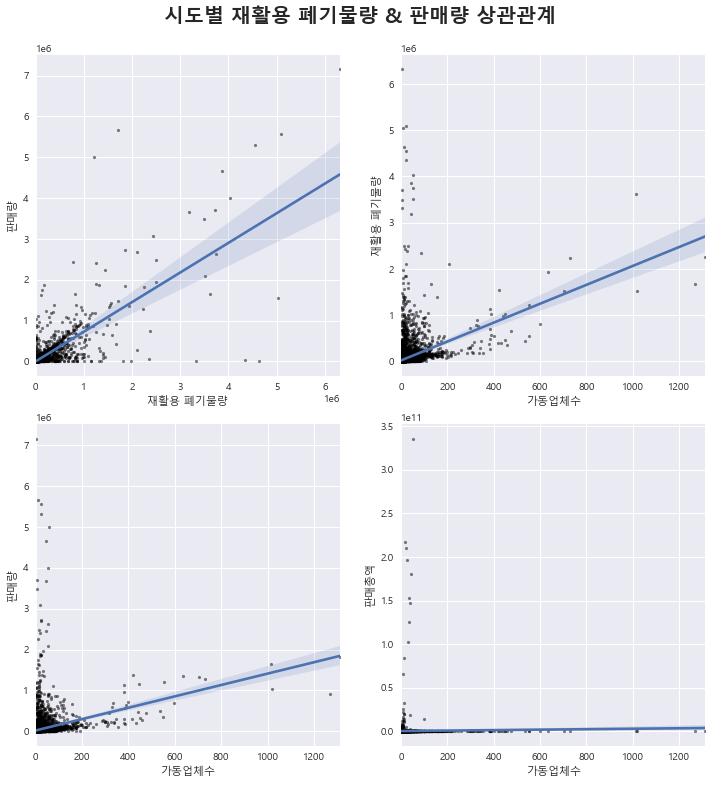

In [639]:
# 데이터 분포 - 시도별 총재활용량 & 생활폐기물총발생량 상관관계

fig, axes = plt.subplots(2, 2, figsize=(12,12))
sns.regplot(x="재활용 폐기물량", y="판매량", data=df_sido, fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10}, ax = axes[0, 0])
sns.regplot(x="가동업체수", y="재활용 폐기물량", data=df_sido, fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10}, ax = axes[0, 1])
sns.regplot(x="가동업체수", y="판매량", data=df_sido, fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10}, ax = axes[1, 0])
sns.regplot(x="가동업체수", y="판매총액", data=df_sido, fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10}, ax = axes[1, 1])

plt.suptitle('시도별 재활용 폐기물량 & 판매량 상관관계', fontsize=20, weight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(bottom=False)
plt.tick_params(left=False)
fig.subplots_adjust(top=0.925, hspace=0.15)
plt.show()

##### 시도별 연도별 추세

In [640]:
df_sido

,지역,연도,폐기물 소분류,분류,가동업체수,재활용 폐기물량,판매량,판매총액
0,강원도,2019,유기성오니류,허가업체,68,436844.0,36906,3.264900e+02
1,강원도,2019,무기성오니류,허가업체,31,1009937.0,361541,2.603099e+04
2,강원도,2019,폐합성고분자화합물,허가업체,90,852900.0,170449,2.380120e+04
3,강원도,2019,광재류,허가업체,6,104067.0,75769,0.000000e+00
4,강원도,2019,분진류,허가업체,7,35391.0,0,0.000000e+00
...,...,...,...,...,...,...,...,...
12211,제주특별자치도,2010,폐지류,신고업체,4,5991.0,3065,3.197143e+08
12212,제주특별자치도,2010,고철 및 금속캔류,신고업체,4,4611.0,3123,3.740043e+08
12213,제주특별자치도,2010,폐합성수지,신고업체,1,127.0,127,0.000000e+00
12214,제주특별자치도,2010,유리병,신고업체,1,33.0,33,0.000000e+00


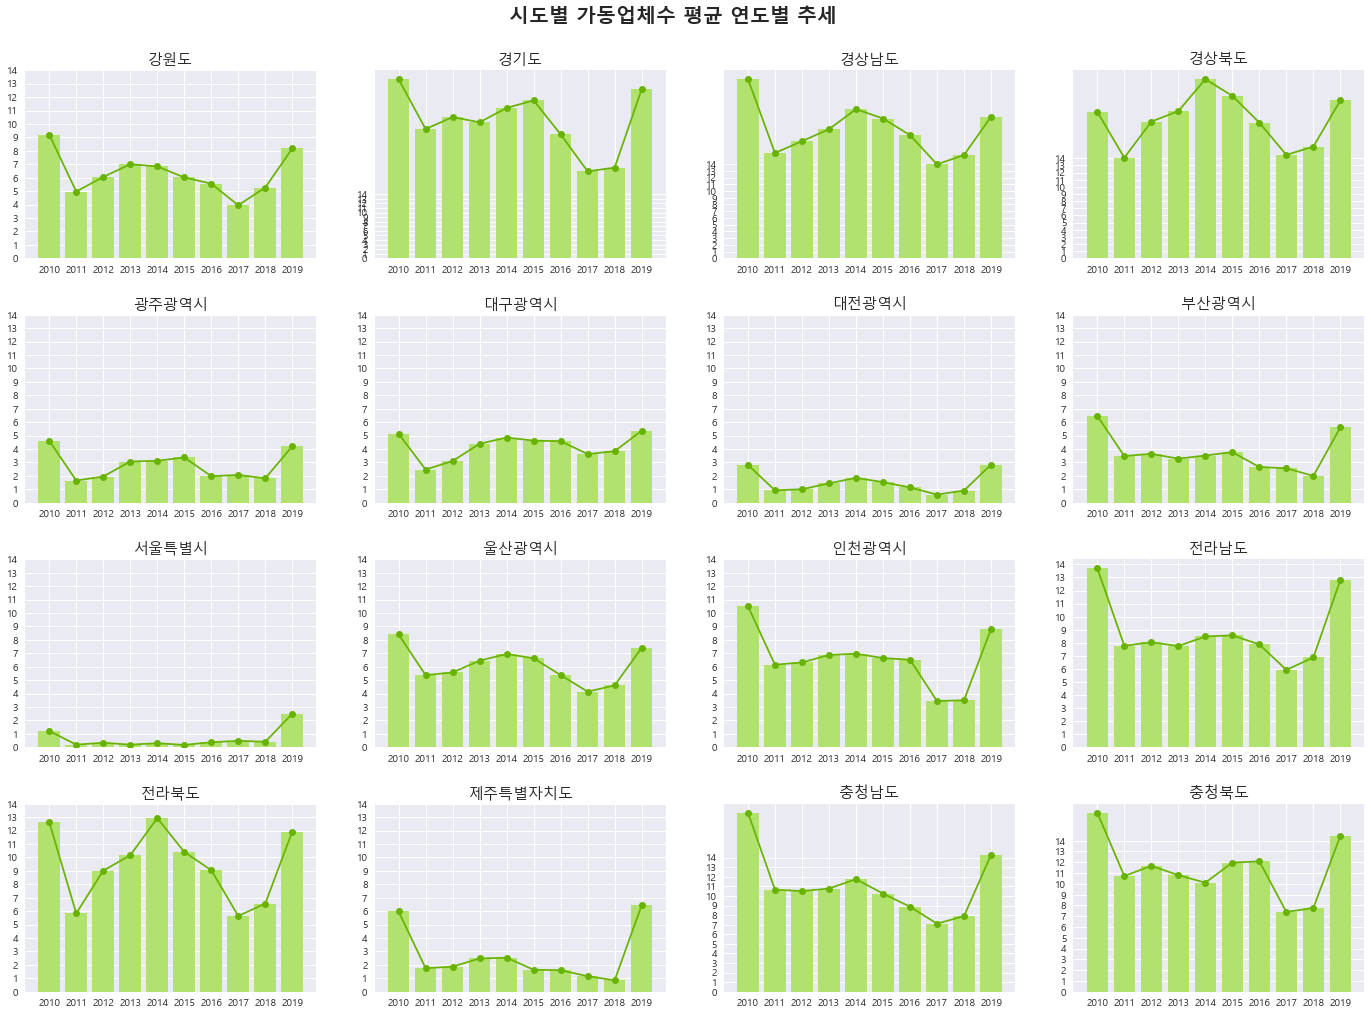

In [641]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['지역'].unique():
    sido_condition = df_sido['지역']== i
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['연도'])[['가동업체수', '재활용 폐기물량', '판매량', '판매총액']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['연도'], df_sido_temp['가동업체수'], color='#b2e26e')
    axs[ax, ay].plot(df_sido_temp['연도'], df_sido_temp['가동업체수'], color='#68b300', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 15, 1)))
    axs[ax, ay].set_xticks(list(df_sido['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 가동업체수 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

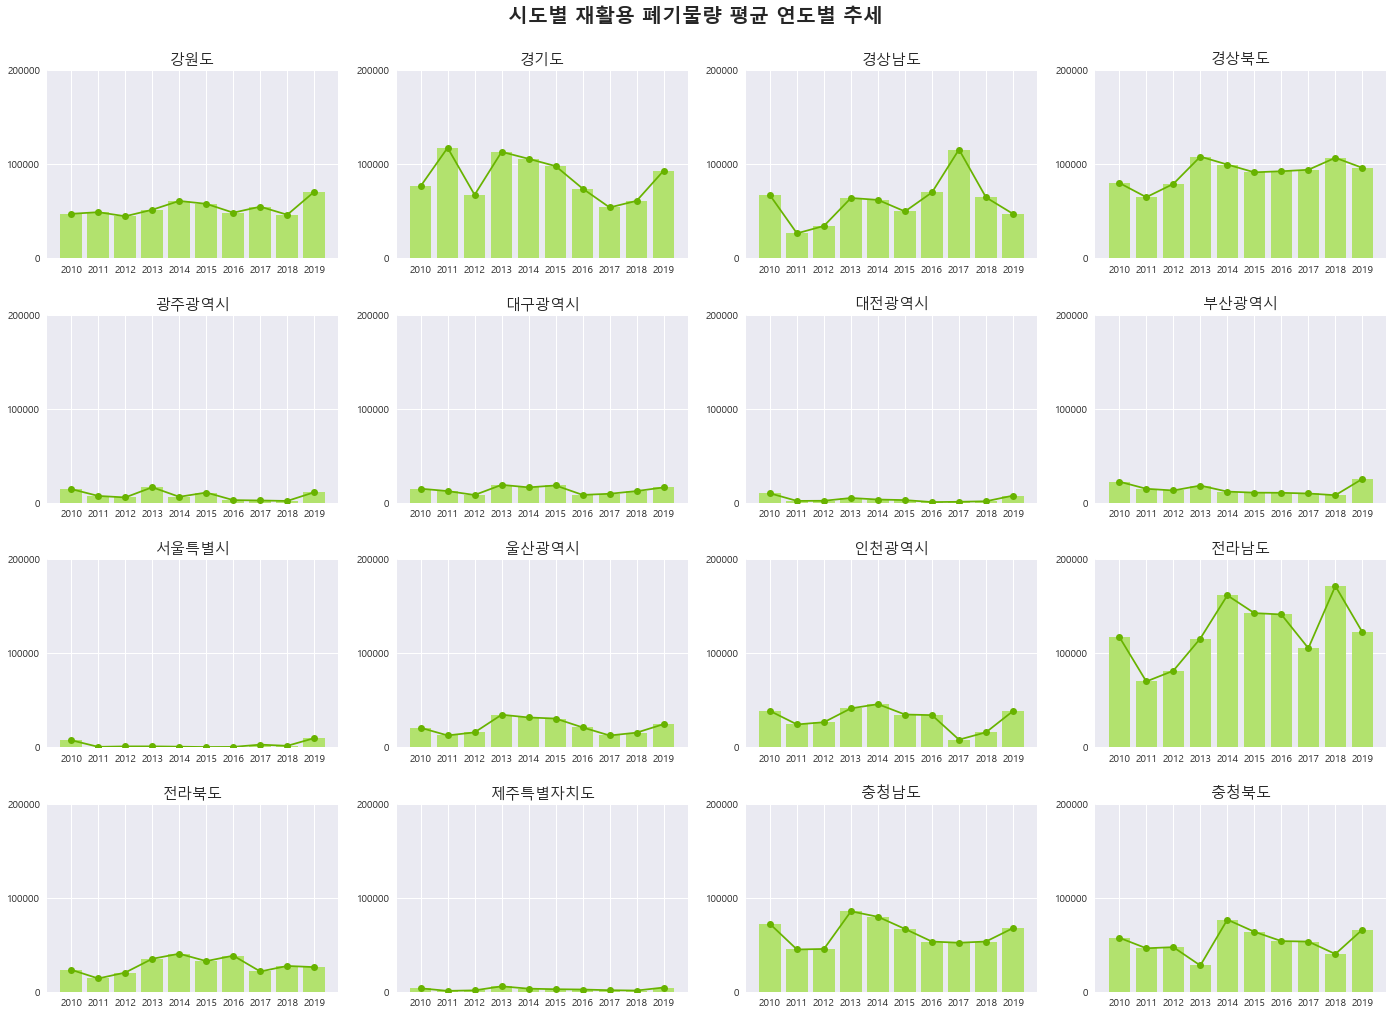

In [642]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['지역'].unique():
    sido_condition = df_sido['지역']== i
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['연도'])[['가동업체수', '재활용 폐기물량', '판매량', '판매총액']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['연도'], df_sido_temp['재활용 폐기물량'], color='#b2e26e')
    axs[ax, ay].plot(df_sido_temp['연도'], df_sido_temp['재활용 폐기물량'], color='#68b300', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 300000, 100000)))
    axs[ax, ay].set_xticks(list(df_sido['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 재활용 폐기물량 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

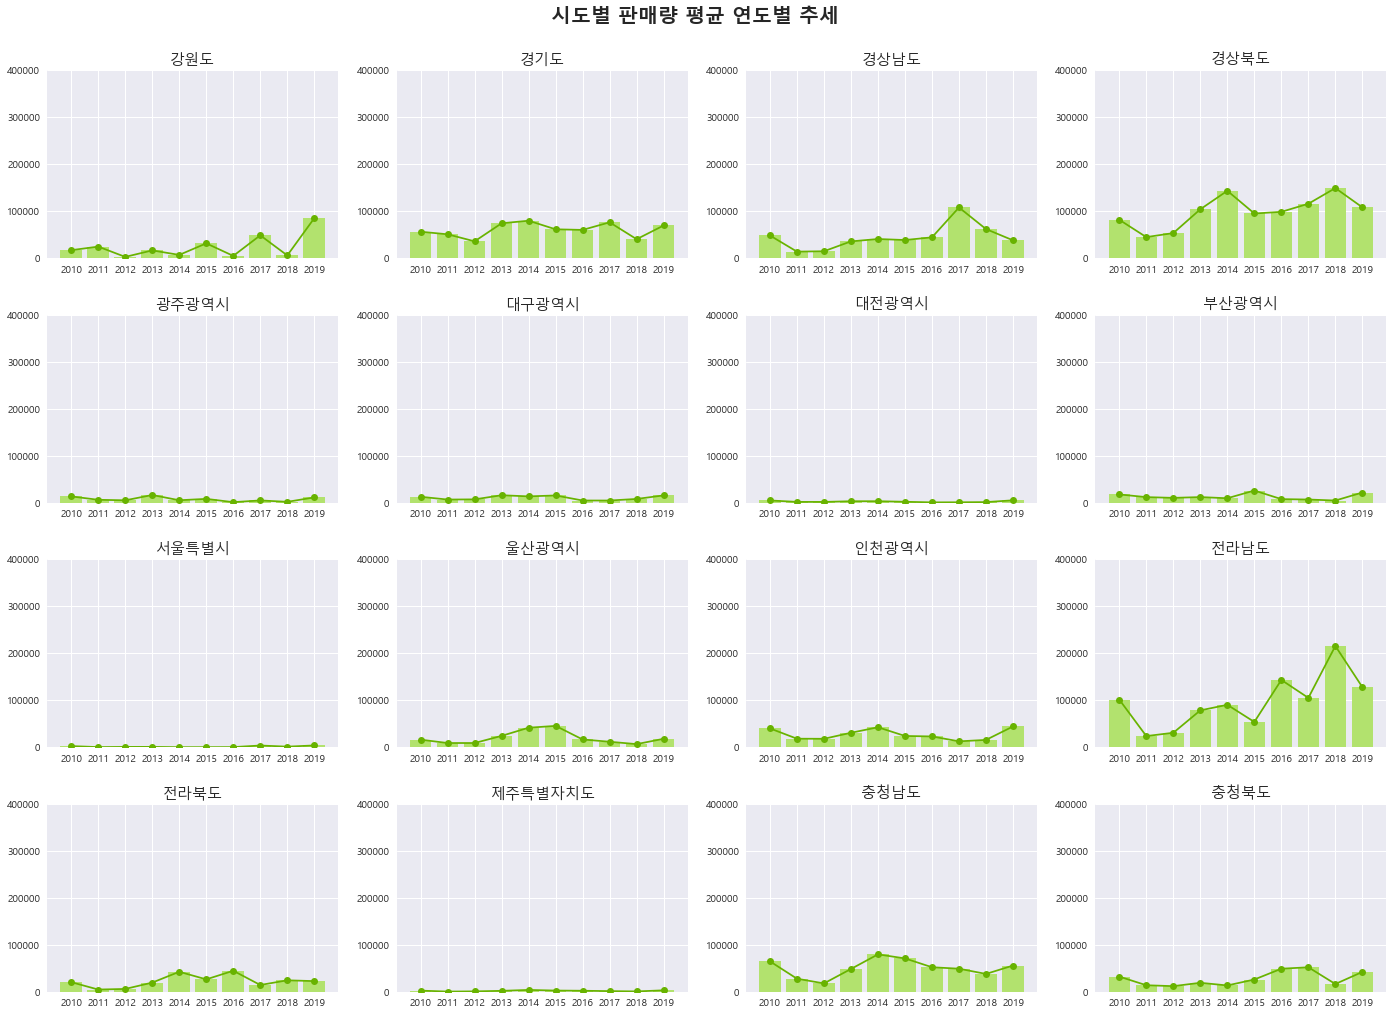

In [643]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['지역'].unique():
    sido_condition = df_sido['지역']== i
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['연도'])[['가동업체수', '재활용 폐기물량', '판매량', '판매총액']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['연도'], df_sido_temp['판매량'], color='#b2e26e')
    axs[ax, ay].plot(df_sido_temp['연도'], df_sido_temp['판매량'], color='#68b300', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 400001, 100000)))
    axs[ax, ay].set_xticks(list(df_sido['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 판매량 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

In [644]:
df_sido_temp = df_sido[sido_condition].groupby(df_sido['연도'])[['분류','가동업체수', '재활용 폐기물량', '판매량', '판매총액']].sum().reset_index()

In [645]:
df_sido_temp

,연도,가동업체수,재활용 폐기물량,판매량,판매총액
0,2010,1792,6204394.0,3491592,2.408962e+10
1,2011,1308,5647989.0,1702159,6.788522e+07
2,2012,1307,5318218.0,1346657,1.293763e+07
3,2013,605,1567159.0,1073456,2.927981e+07
4,2014,566,4296628.0,756213,3.392817e+07
5,2015,670,3576010.0,1463579,1.758017e+07
6,2016,677,3019940.0,2748840,6.049196e+07
7,2017,414,2990696.0,2920456,1.342028e+08
8,2018,435,2250750.0,928360,8.946044e+07
9,2019,1444,6610099.0,4228832,6.691197e+07


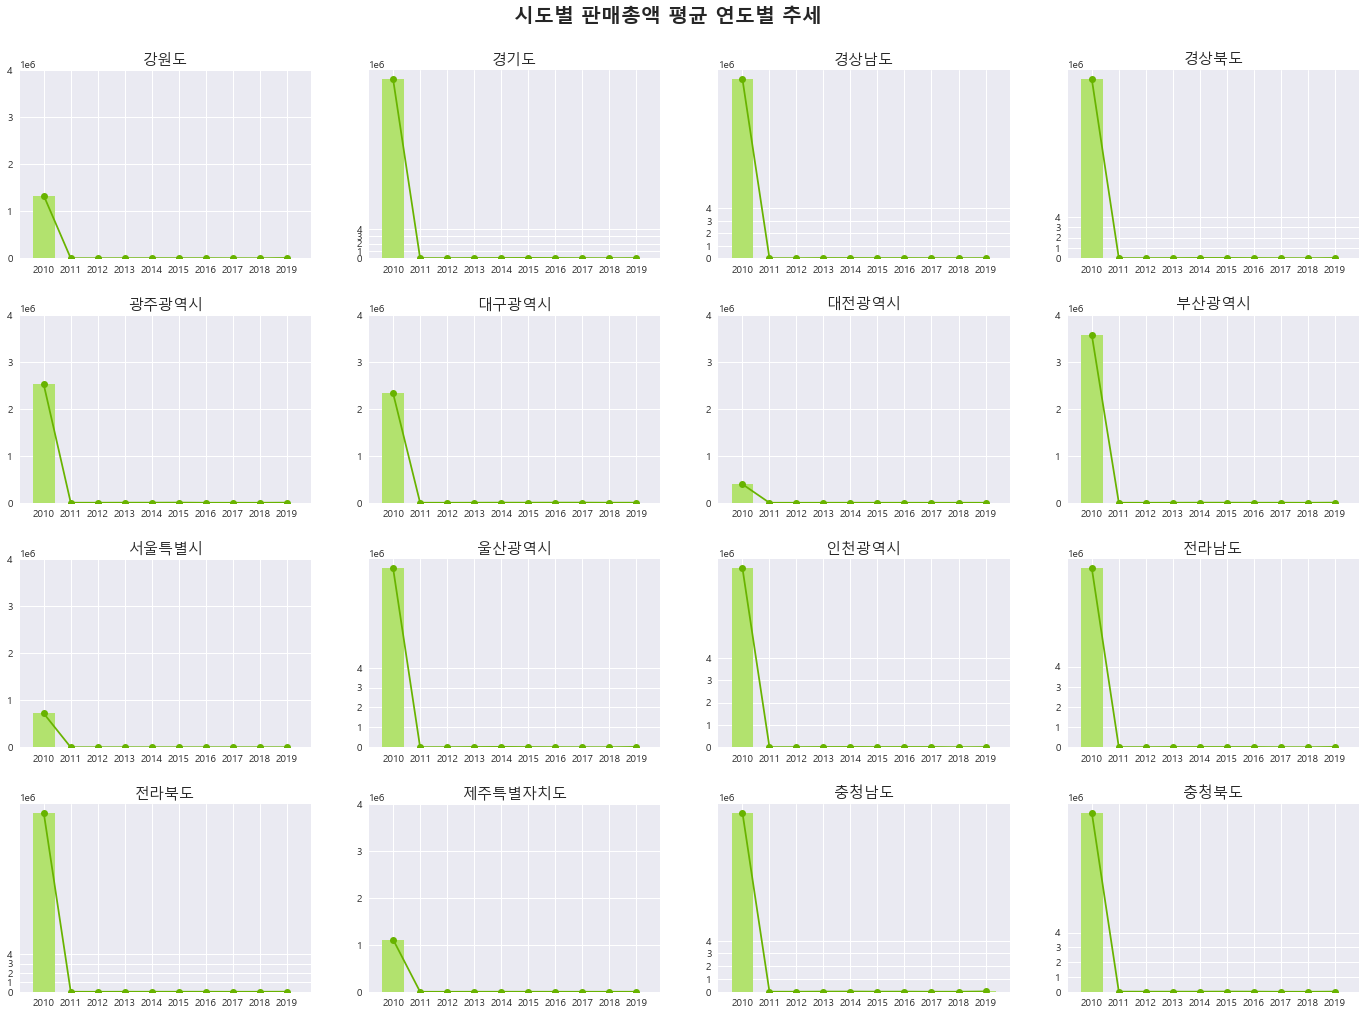

In [648]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df_sido['지역'].unique():
    sido_condition = (df_sido['지역']== i)&(df_sido['분류']=='허가업체')
    df_sido_temp = df_sido[sido_condition].groupby(df_sido['연도'])[['분류','가동업체수', '재활용 폐기물량', '판매량', '판매총액']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_sido_temp['연도'], df_sido_temp['판매총액'], color='#b2e26e')
    axs[ax, ay].plot(df_sido_temp['연도'], df_sido_temp['판매총액'], color='#68b300', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 4000001, 1000000)))
    axs[ax, ay].set_xticks(list(df_sido['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 판매총액 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()